In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

2023-06-18 13:40:32.116642: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-18 13:40:33.158710: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-18 13:40:37.931988: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/jrehagen/miniconda3/envs/tf/lib/:/home/jrehagen/miniconda3/envs/tf/lib/python3.9/site-packages/nvidia/cudnn/lib
2023-06-18 13:40:37.947342: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] C

In [2]:
tf.config.set_visible_devices([], 'GPU')

2023-06-18 13:40:43.875064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-18 13:40:44.176899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-06-18 13:40:44.177017: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2d:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 0 Logical GPUs


2023-06-18 13:40:44.206344: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
xtest = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


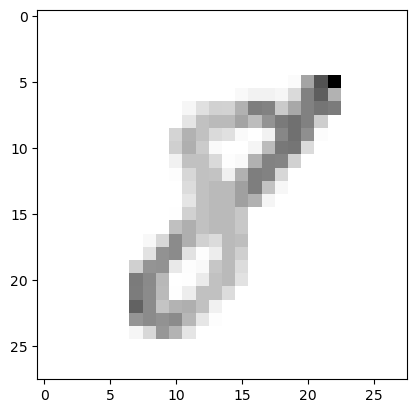

In [7]:
plt.imshow(x_train[17], cmap = 'Greys')

In [8]:
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(30,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 30)                23550     
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_onehot_train = tf.one_hot(y_train,10)
model.fit(x_train,y_onehot_train,epochs = 10, batch_size = 1)

2023-06-18 13:49:36.629222: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
60000/60000 [==============================] - 245s 4ms/step - loss: 0.1532 - accuracy: 0.9555
Epoch 2/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1296 - accuracy: 0.9629
Epoch 3/10
60000/60000 [==============================] - 232s 4ms/step - loss: 0.1135 - accuracy: 0.9670
Epoch 4/10
60000/60000 [==============================] - 230s 4ms/step - loss: 0.1050 - accuracy: 0.9695
Epoch 5/10
38305/60000 [==================>...........] - ETA: 1:47 - loss: 0.0944 - accuracy: 0.9712

In [ ]:
 model.save